# Email spam detection

In [ ]:
#import the libraries
import numpy as np
import pandas as pd

In [2]:
#read the csv file
df=pd.read_csv("spam.csv",encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [3]:
#drop the unwanted columns
df.drop('Unnamed: 3',axis=1,inplace=True)

In [4]:
df.drop('Unnamed: 4',axis=1,inplace=True)

In [9]:
df.drop('Unnamed: 4',axis=1,inplace=True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
df['v1'].unique()

array(['ham', 'spam'], dtype=object)

In [11]:
#get the null values
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import *


In [6]:
df['v1'].value_counts()['ham']

4825

In [16]:
df['v1'].value_counts()['spam']

747

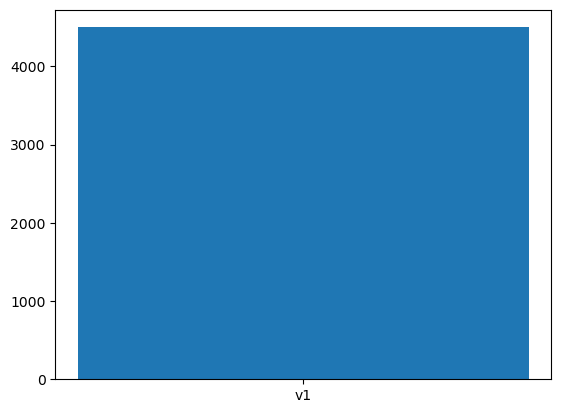

In [23]:
y=[]
for i in range(0,5000,500):
    y.append(i)
plt.bar('v1',y)
plt.show()

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['v1']=le.fit_transform(df['v1'])
df

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [10]:

df.drop('Unnamed: 2',axis=1,inplace=True)

In [11]:
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df['v1']=df['v1'].map({'ham':0,'spam':1})

In [14]:
df[:5]

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# Algorithm 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
cv=CountVectorizer()

In [37]:
x=df['v2']
y=df['v1']

In [38]:
print(x.shape,y.shape)

(5572,) (5572,)


In [39]:
x=cv.fit_transform(x)

In [40]:
x

<5572x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 73916 stored elements in Compressed Sparse Row format>

In [41]:
#split the data into training and testing
from sklearn.model_selection import train_test_split

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [50]:
x_train.shape

(4457, 8672)

In [51]:
i
from sklearn.naive_bayes import MultinomialNB

In [52]:
model=MultinomialNB()

In [55]:
model.fit(x_train,y_train)

MultinomialNB()

In [61]:
result=model.score(x_test,y_test)*100
result

99.10313901345292

In [62]:
import pickle

In [68]:
pickle.dump(model,open("spam.pkl","wb"))

In [69]:
pickle.dump(cv,open("vectorizer.pkl",'wb'))

In [70]:
clf=pickle.load(open("spam.pkl",'rb'))

In [71]:
clf

MultinomialNB()

In [72]:
msg="hello"
df=[msg]
vect=cv.transform(df).toarray()
result=model.predict(vect)
print(result)

[0]


In [76]:
import pickle 

model=pickle.load(open("spam.pkl","rb"))
cv=pickle.load(open("vectorizer.pkl","rb"))

    

In [77]:
import streamlit as st

ModuleNotFoundError: No module named 'streamlit'

In [82]:
!pip install streamlit

In [85]:
import streamlit as st
def main():
    st.title("Email Spam Detection")
main()    

2023-05-23 23:30:24.953 
  command:

    streamlit run C:\Users\rajar\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [89]:
!streamlit run emailspam.ipynb

    


Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Streamlit requires raw Python (.py) files, not .ipynb.
For more information, please see https://docs.streamlit.io


In [ ]:
!streamlit run w.py

In [ ]:
# using the streamlit we detect the emailis spam or not